In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
# Read data
filename = 'Melatoninlevels.csv'
df = pd.read_csv(filename)
print df.head()

     ID  group  Time: 18  Time: 22  Time: 2  Time: 6  Time: 10  Time: 14
0  1259      1      0.06     11.95    43.88    21.30      1.05      1.00
1  1447      1      0.63      3.23     3.10     3.35      3.99      0.01
2  1707      1      0.01      0.44     3.78     5.19      2.07      0.17
3  1831      1      0.01      2.10     4.00     1.57      0.01      0.01
4  1955      1      0.49      9.49    12.55     5.11      2.54      0.44


In [3]:
# replace categories with names
df['Group']=df['group']
df['Group'].replace(to_replace={1:'Patient', 2:'Control'}, inplace=True)

# replace column names "Time: 2" to "2"
colnames = df.columns.values
for colname in colnames:
    if colname.startswith('Time: '):
        newname = colname.replace('Time: ', '')
        #print newname
        df = df.rename(columns={colname:newname})
        
df.head()

,ID,group,18,22,2,6,10,14,Group
0,1259,1,0.06,11.95,43.88,21.30,1.05,1.00,Patient
1,1447,1,0.63,3.23,3.10,3.35,3.99,0.01,Patient
2,1707,1,0.01,0.44,3.78,5.19,2.07,0.17,Patient
3,1831,1,0.01,2.10,4.00,1.57,0.01,0.01,Patient
4,1955,1,0.49,9.49,12.55,5.11,2.54,0.44,Patient


In [4]:
# reshape data from wide to long form
df=pd.melt(df, 
            id_vars=['ID','group', 'Group'], 
            value_vars=['2', '6', '10', '14', '18', '22'],
            var_name='Time', value_name='Melatonin')
df.head(10)

,ID,group,Group,Time,Melatonin
0,1259,1,Patient,2,43.88
1,1447,1,Patient,2,3.10
2,1707,1,Patient,2,3.78
3,1831,1,Patient,2,4.00
4,1955,1,Patient,2,12.55
5,2025,1,Patient,2,33.93
6,2261,1,Patient,2,12.24
7,2303,1,Patient,2,24.57
8,2803,1,Patient,2,8.90
9,4152,1,Patient,2,42.16


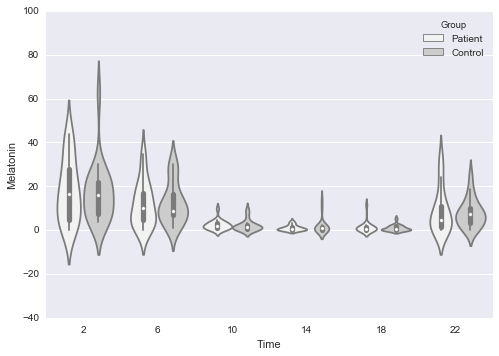

In [6]:
ax = sns.violinplot(data=df, x='Time', y='Melatonin', hue='Group', split=False, size=15.0, color=".8", order=['2','6','10','14','18','22'])
#ax = sns.stripplot(data=df, x='Time', y='Melatonin', hue='Group', jitter=True)
fig = ax.get_figure()
fig.savefig('1.png')

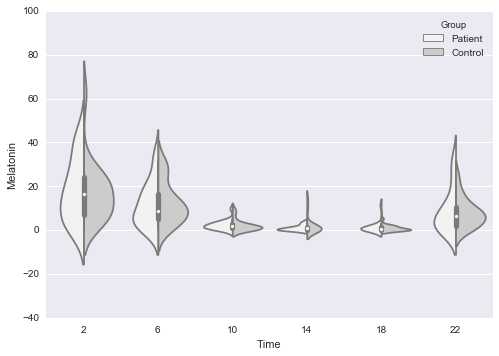

In [7]:
ax = sns.violinplot(data=df, x='Time', y='Melatonin', hue='Group', split=True, size=15.0, color=".8", order=['2','6','10','14','18','22'])
fig = ax.get_figure()
fig.savefig('2.png')

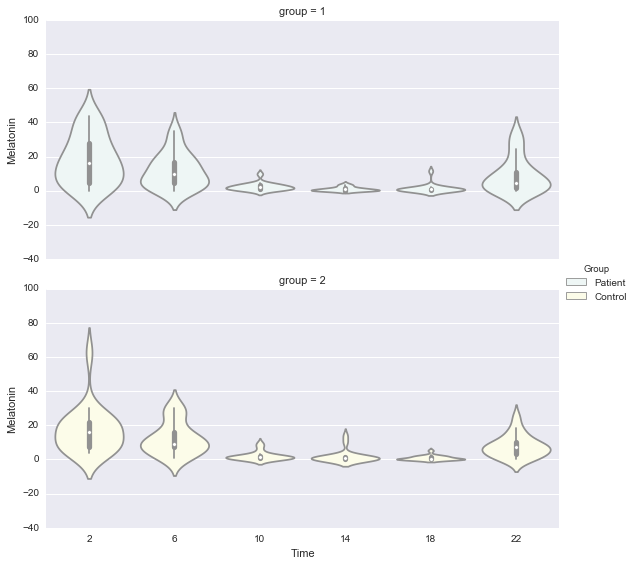

In [9]:
g = sns.FacetGrid(data=df, row="group", hue='Group',  palette='Set3', size=4.0, aspect=2.0)
(g.map(sns.violinplot, 'Time', 'Melatonin', 'Group', c=df['group'], split=False, size=15.0, order=['2','6','10','14','18','22'])
.despine(left=True)
.add_legend(title="Group"))
g.savefig('3.png')

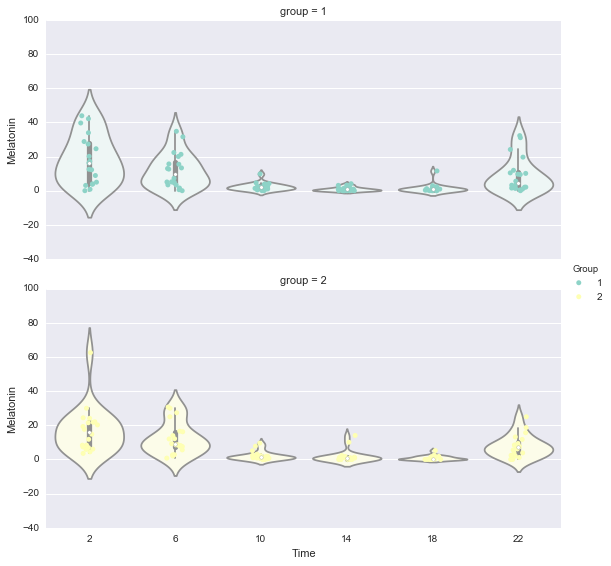

In [10]:
g = sns.FacetGrid(data=df, row="group", hue='group', palette='Set3', size=4.0, aspect=2.0)
(g.map(sns.stripplot, 'Time', 'Melatonin', c=df['group'], order=['2','6','10','14','18','22'], jitter=True))
(g.map(sns.violinplot, 'Time', 'Melatonin', 'Group', c=df['group'], split=False, size=15.0, order=['2','6','10','14','18','22'])
.despine(left=True)
.add_legend(title="Group"))
g.savefig('4.png')